## A 2DCNN network for MNIST image classification

In [ ]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Conv1D, MaxPooling1D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from keras.utils import to_categorical

from __future__ import print_function
import datetime
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import Model
from keras import backend as K
import os
from skimage.io import imsave

# Get the training data

In [ ]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


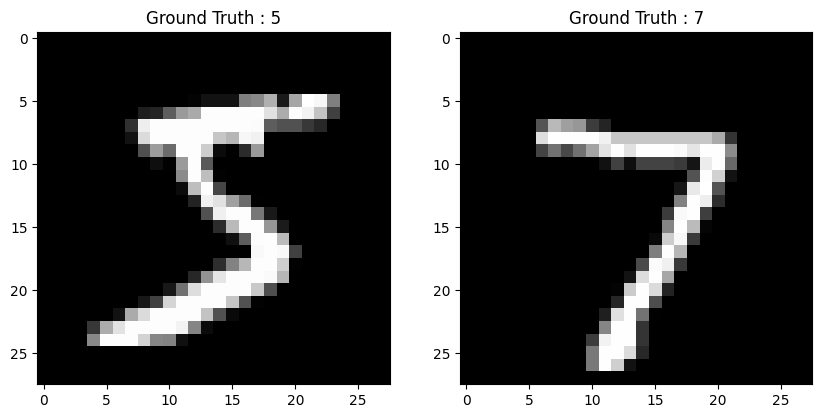

In [ ]:
# let's see some sample images in the dataset

# Define the plot size
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

### Alternative: Use seaborn or OpenCV for visualization

In [ ]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# Now reshape the 2D array to 3D array (#samples, height, width, channel)

train_data = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_data = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

In [ ]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Define Model using Functional API

from keras.layers import Input
# Define the input
inputs = Input(shape=(28, 28, 1))

# Add layers
x = Conv2D(filters=4, kernel_size=(3, 3), activation="relu")(inputs)
x = Conv2D(filters=4, kernel_size=(3, 3), activation="relu", name='conv2d_1')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(classes_num, activation="softmax")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,334 (294.27 KB)

 Trainable params: 75,334 (294.27 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [ ]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, verbose =1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8595 - loss: 2.0790 - val_accuracy: 0.9624 - val_loss: 0.1206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9693 - loss: 0.0998 - val_accuracy: 0.9713 - val_loss: 0.0924
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9787 - loss: 0.0666 - val_accuracy: 0.9759 - val_loss: 0.0760
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9771 - val_loss: 0.0753
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9868 - loss: 0.0396 - val_accuracy: 0.9785 - val_loss: 0.0752
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9767 - val_loss: 0.0748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9911 - loss: 0.0259 - val_accuracy: 0.9810 - val_loss: 0.0725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9936 - loss: 0.0200

## Evaluate the model

In [ ]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.1303
Evaluation result on Test Data : Loss = 0.10159455239772797, accuracy = 0.9764999747276306


## Run the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Probability of all the classes: [[2.5494614e-16 1.9072936e-11 1.0000000e+00 4.0170690e-15 3.7561655e-15
  8.4836446e-18 5.4507187e-11 3.8573021e-15 6.2213312e-15 1.2895857e-17]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model prediction: 2


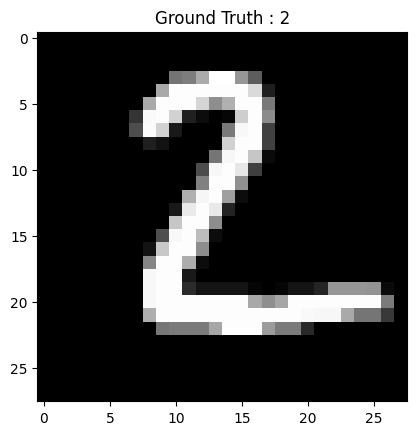

In [ ]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])),axis=1))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Probability of all the classes: [[1.24433168e-17 1.03594175e-04 8.00269097e-02 2.54711886e-05
  3.28969470e-14 4.35568985e-16 2.31688366e-16 9.19844031e-01
  1.48792095e-14 7.46440737e-14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model prediction: 7


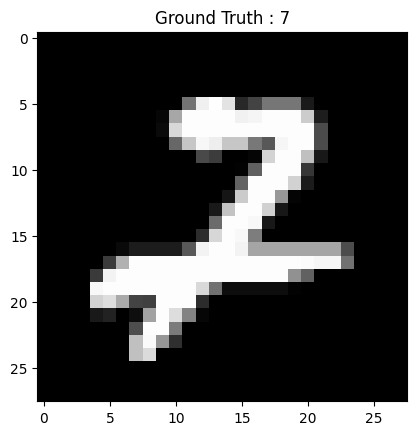

In [ ]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[9009]])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[9009]])),axis=1))

# Display the predicted image
plt.imshow(test_images[9009], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[9009]))
plt.show()

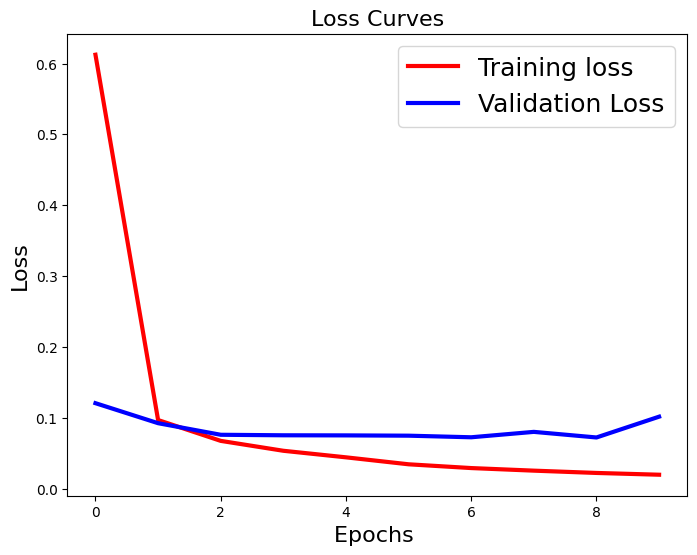

In [ ]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

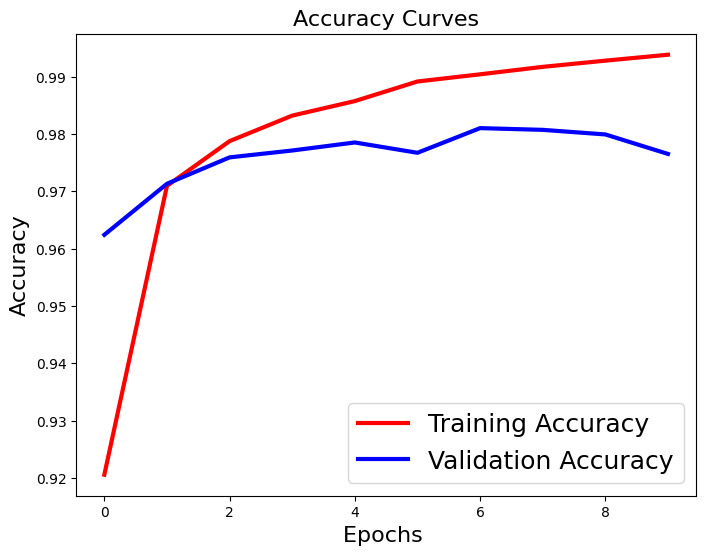

In [ ]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

### Confusion Matrix

In [ ]:
DIGITS = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
}

In [ ]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([DIGITS[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([DIGITS[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [ ]:
print(confusion_matrix(test_labels_one_hot, model.predict(test_data)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pred    0     1     2    3    4    5    6     7    8    9
True                                                     
0     960     2     2    0    0    8    6     1    1    0
1       0  1125     1    0    1    1    4     1    2    0
2       2     2  1023    0    0    1    0     2    2    0
3       1     0     3  960    0   37    0     2    5    2
4       0     0     2    0  962    0    3     2    2   11
5       0     0     2    1    0  884    2     0    2    1
6       6     2     1    0    2   13  932     1    1    0
7       0     2    12    0    1    1    0  1002    1    9
8       3     1     6    1    0   10    0     3  942    8
9       0     3     0    0   12    7    0     4    8  975


## Classification report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

y_true = np.argmax(test_labels_one_hot, axis=1)
y_pred = np.argmax(model.predict(test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
report = classification_report(y_true, y_pred,digits=4)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0     0.9877    0.9796    0.9836       980
           1     0.9894    0.9912    0.9903      1135
           2     0.9724    0.9913    0.9818      1032
           3     0.9979    0.9505    0.9736      1010
           4     0.9836    0.9796    0.9816       982
           5     0.9189    0.9910    0.9536       892
           6     0.9842    0.9729    0.9785       958
           7     0.9843    0.9747    0.9795      1028
           8     0.9752    0.9671    0.9711       974
           9     0.9692    0.9663    0.9677      1009

    accuracy                         0.9765     10000
   macro avg     0.9763    0.9764    0.9761     10000
weighted avg     0.9770    0.9765    0.9766     10000



In [ ]:
print(accuracy_score(y_true, y_pred))

0.9765


### Save the model

In [ ]:
model.save("2DCNN_MNIST.h5")

### Get the names of model layers in the dictionary

In [ ]:
# get the symbolic outputs of each "key" layer
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'input_layer': <InputLayer name=input_layer, built=True>, 'conv2d': <Conv2D name=conv2d, built=True>, 'conv2d_1': <Conv2D name=conv2d_1, built=True>, 'max_pooling2d': <MaxPooling2D name=max_pooling2d, built=True>, 'flatten': <Flatten name=flatten, built=True>, 'dense': <Dense name=dense, built=True>, 'dense_1': <Dense name=dense_1, built=True>}


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,004 (882.83 KB)

 Trainable params: 75,334 (294.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 150,670 (588.56 KB)

### Visualise the filters (not the feature maps)

(3, 3, 4, 4)
(4, 4, 3, 3)


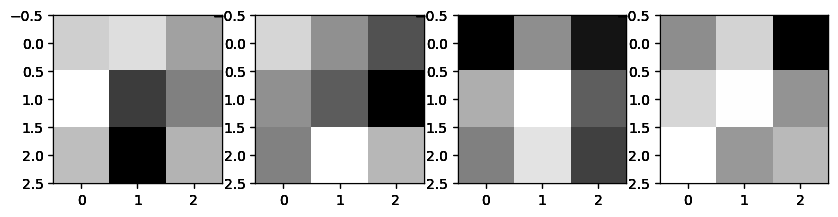

In [ ]:
layer_variables = model.get_layer('conv2d_1').get_weights() # get the layer variables from the model
weights = layer_variables[0]  # weights are the actual filter values
biases = layer_variables[1]   # biases of the layer
w = np.array(weights)
print(w.shape)

# Now to visualize each of the filters we need to shift the axis
w = np.moveaxis(w, 2, 0) # move axis 2 to 0
w = np.moveaxis(w, 3, 0) # move axis 3 to 0
print(w.shape)

# the total filter in previous layers can be obtained from w.shape[1]
total_filters_in_prev_layers = 4
cols = 4
rows = 1
# rows * cols > total_filters
# current_filter = which filter's weights we want to see
current_filter = 1 # change this to see other filters as you wish
fig = plt.figure(figsize=(10, 10))
for i in range(w.shape[0]):
    current_filter = i
    for each_depth in range(w.shape[1]):
        fig.add_subplot(rows, cols, current_filter+1)
        plt.imshow(w[current_filter][each_depth], cmap='gray')

### Sample image

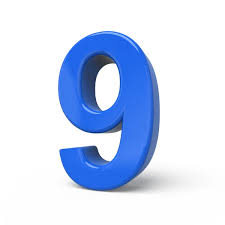

(28, 28)


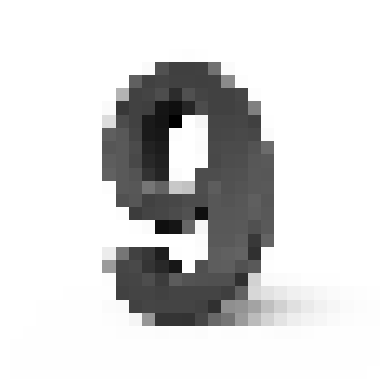

(1, 28, 28, 1)


In [ ]:
import urllib.request
# Load image from URL
url = 'https://raw.githubusercontent.com/jyotie02/Deep_Learning/main/Deep_Learning/Digit_9.jpeg'  # Note: 'raw' URL needed
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to 28x28
img2 = cv2.resize(img, (28, 28))
print(img2.shape)

# Display
plt.imshow(img2, cmap="gray")
plt.axis('off')
plt.show()

# Reshape for model input
img2 = np.reshape(img2, (1, img2.shape[0], img2.shape[1], 1))
print(img2.shape)


### Obtain the intermediate layers for visualisation

In [ ]:
# name of the layer to visualise
layer_name = 'conv2d_1'
# get the chopped model with layers between input and the layer_name(which we want to visualise)
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
# run the prediction with chopped model
intermediate_output = intermediate_layer_model.predict(img2)
# print(intermediate_output)
print(intermediate_output.shape)
output = np.squeeze(intermediate_output) # remove single dimension entries from array
print(output.shape) # see the effect of squeeze
output = np.moveaxis(output, 2, 0)
print(output.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
(1, 24, 24, 4)
(24, 24, 4)
(4, 24, 24)


### Visualise the outputs of the intermediate layers

### These are the actual activations obtained, that is, feature maps

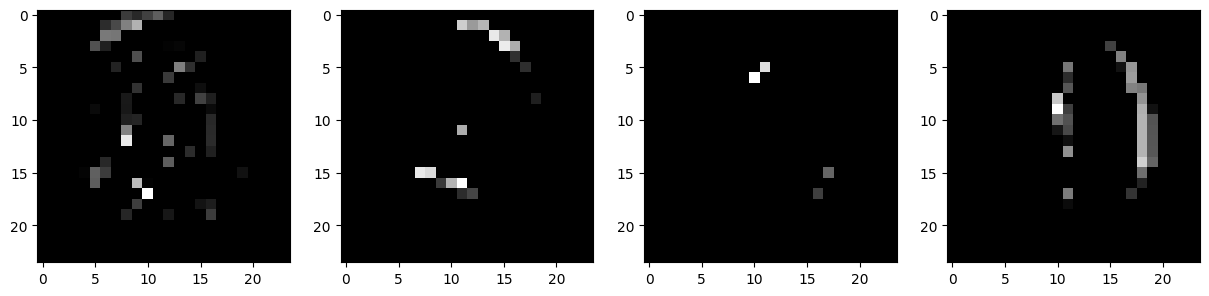

In [ ]:
fig = plt.figure(figsize=(15,15)) # size of each figure in the grid
no_filters = 4
cols = 4
rows = 1 # cols * rows = no. of filters
for i in range(output.shape[0]):
    fig.add_subplot(rows, cols, i+1) # one subplot for each filter i+1 is the index of the filters
    plt.imshow(output[i], cmap='gray') # show the filter outputs as grayscale images

### Visualize what pattern in the input image excites a specific filter

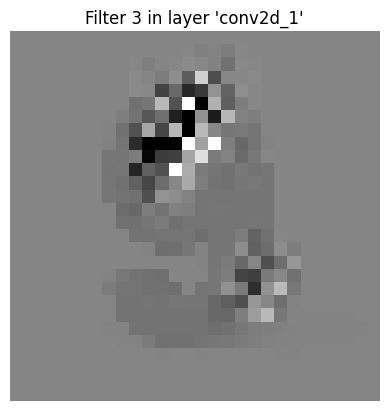

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Get the layer you want to visualize
layer_name = 'conv2d_1'
filter_index = 2

# Create a sub-model up to the desired layer
sub_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Start from a sample image
input_img = tf.Variable(tf.cast(img2, dtype=tf.float32))

# Optimization loop to increase filter activation
learning_rate = 10.0

for i in range(40):  # Number of gradient ascent steps
    with tf.GradientTape() as tape:
        activation = sub_model(input_img) #Pass the image through the sub_model to get feature maps at conv2d_1.
        #Extract only the activation of the selected filter.
        #Loss function will be the mean of all the values in the output layer filter.
        # after convolution assume that the shape of output is n*n then we'll average out all the values to have a single value
        loss = tf.reduce_mean(activation[:, :, :, filter_index]) #
    grads = tape.gradient(loss, input_img)  #Find gradient of loss_fxn w.r.t. the input_img
    # Normalize gradients
    grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

    # Gradient ascent
    # Update the image in the direction that increases the filter’s response
    input_img.assign_add(learning_rate * grads)

# Process and display result
result = input_img.numpy()[0]
result = (result - result.mean()) / (result.std() + 1e-5)
result = np.clip(result * 0.1 + 0.5, 0, 1)

plt.imshow(result.squeeze(), cmap='gray')
plt.title(f"Filter {filter_index+1} in layer '{layer_name}'")
plt.axis('off')
plt.show()